<a href="https://colab.research.google.com/github/Nil-tech/DISEASE_PREDICTION_PREDICTIVE_ANALYSIS/blob/main/PREDICTIVE_ANALYSIS_OF_DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install gradio


In [19]:
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier

LOAD AND PROCESS THE DATASET

In [20]:
url_heart = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names_heart = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target_heart']
data_heart = pd.read_csv(url_heart, names=column_names_heart, na_values='?')

url_diabetes = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names_diabetes = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'target_diabetes']
data_diabetes = pd.read_csv(url_diabetes, names=column_names_diabetes)

data_combined = pd.merge(data_heart, data_diabetes, on='age', how='inner')

VISUALIZATION OF DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnanci

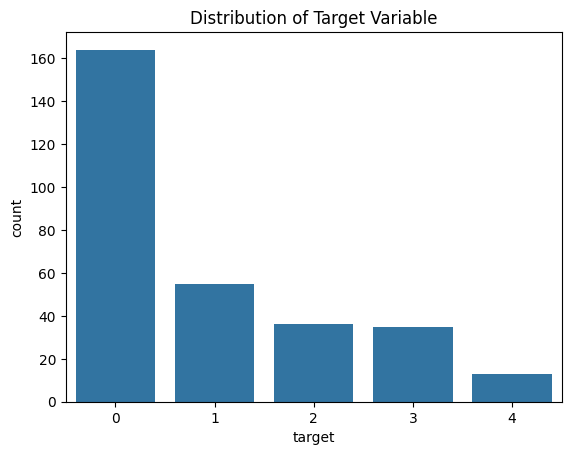

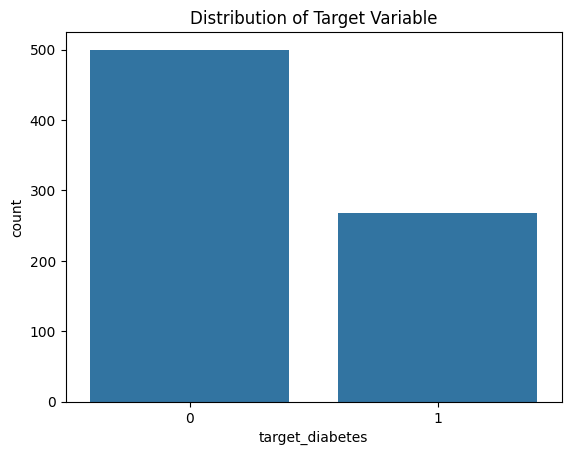

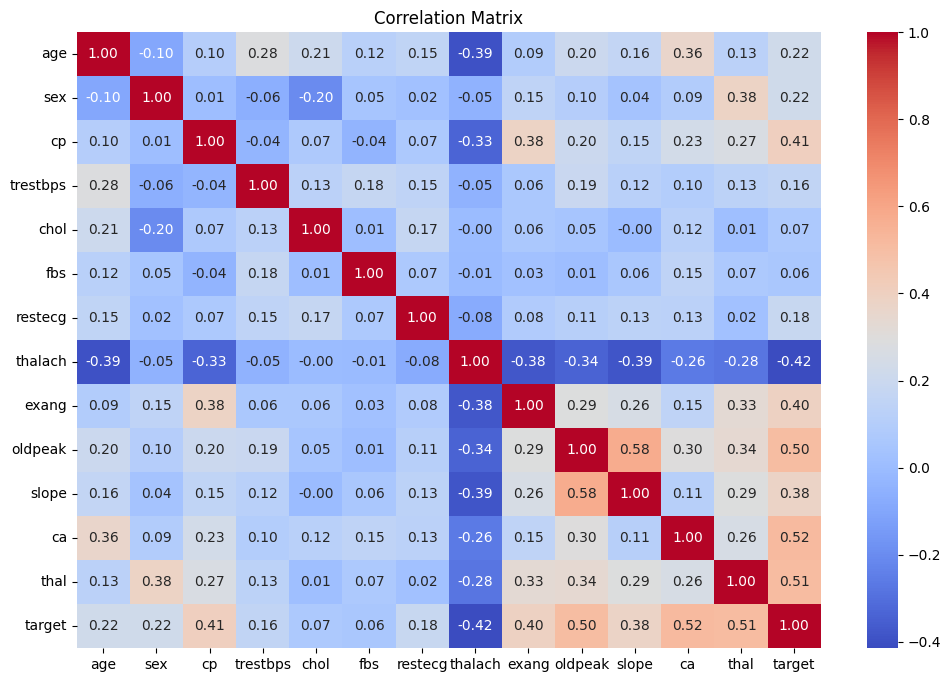

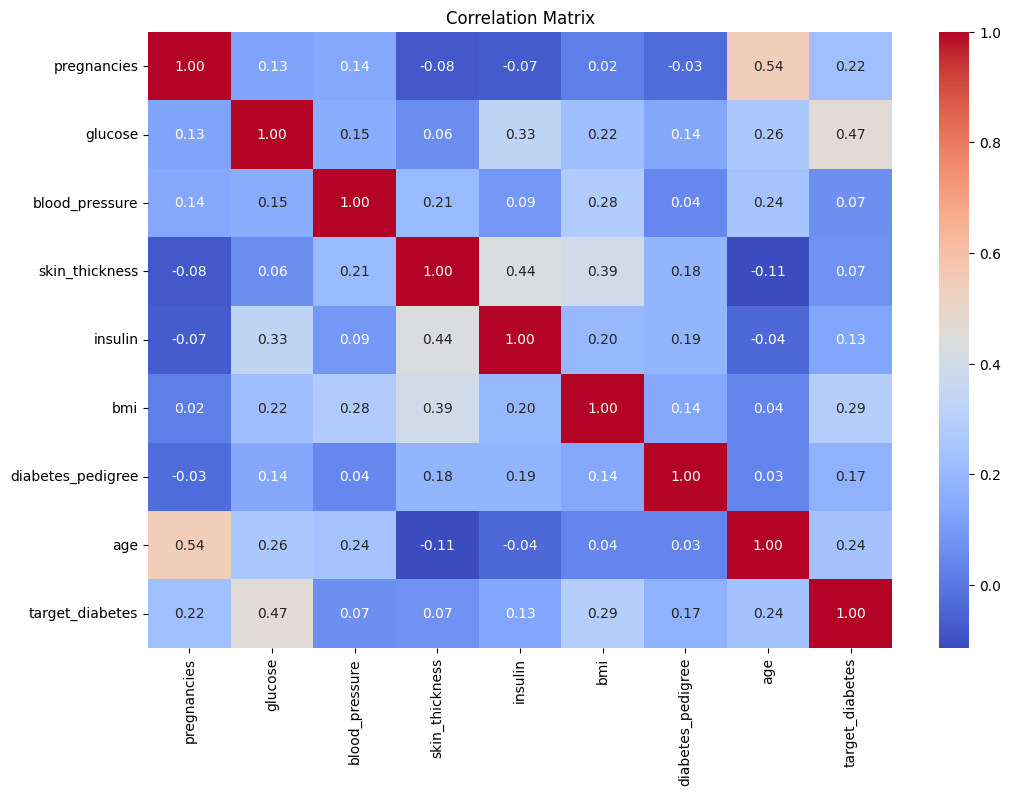

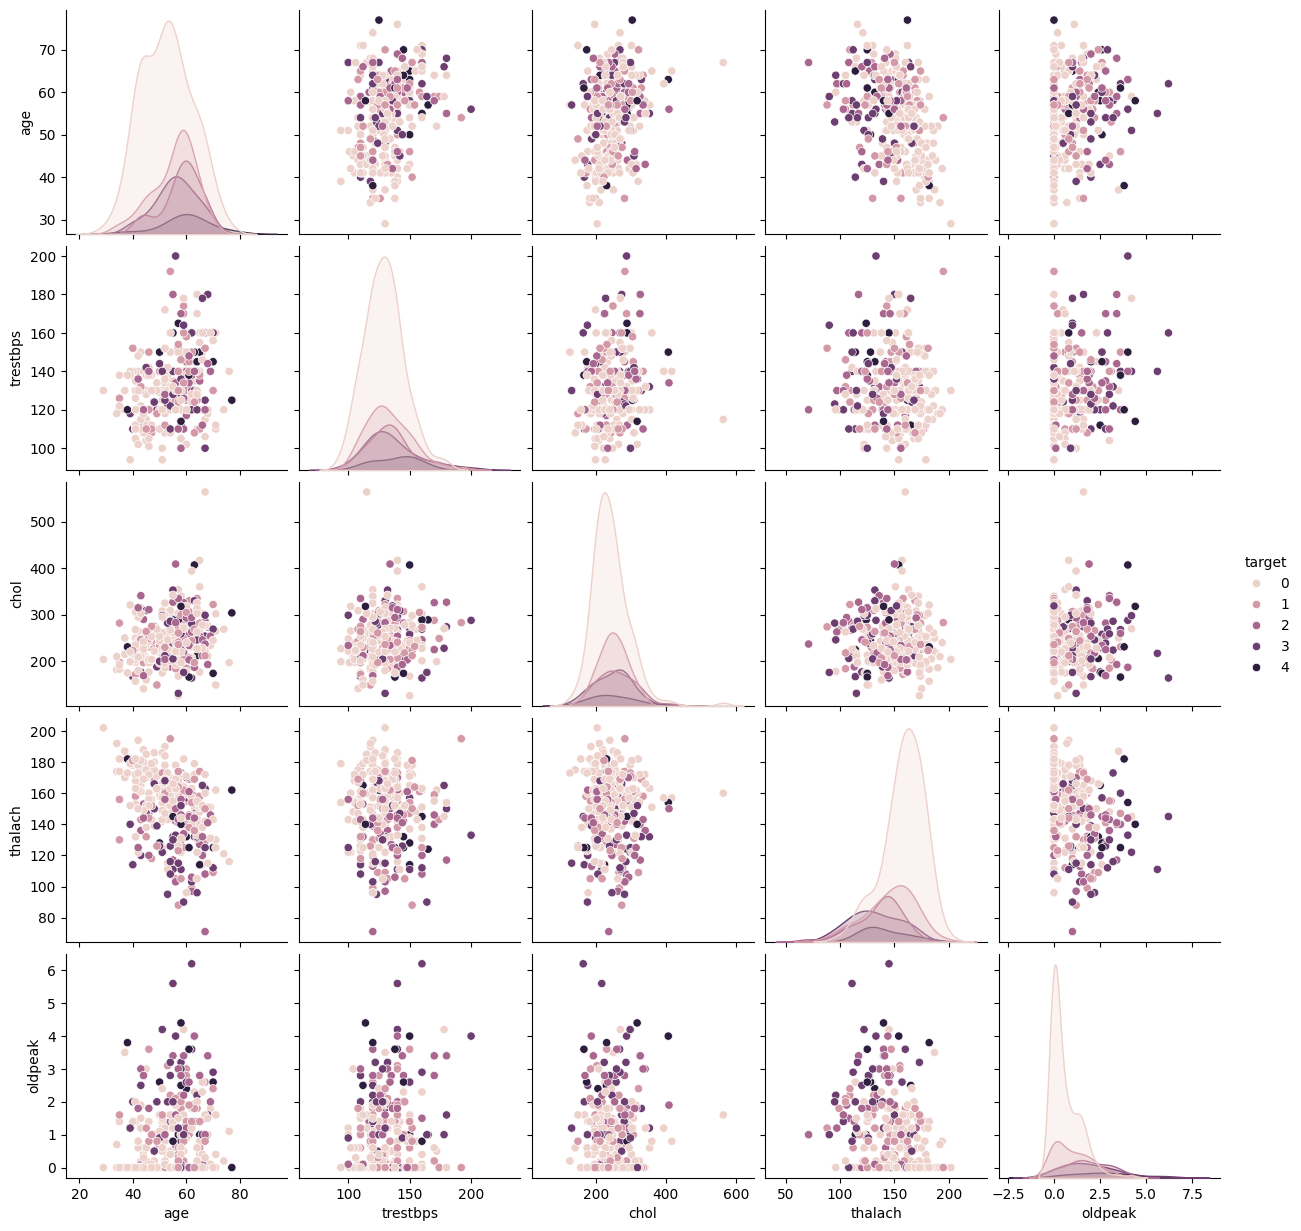

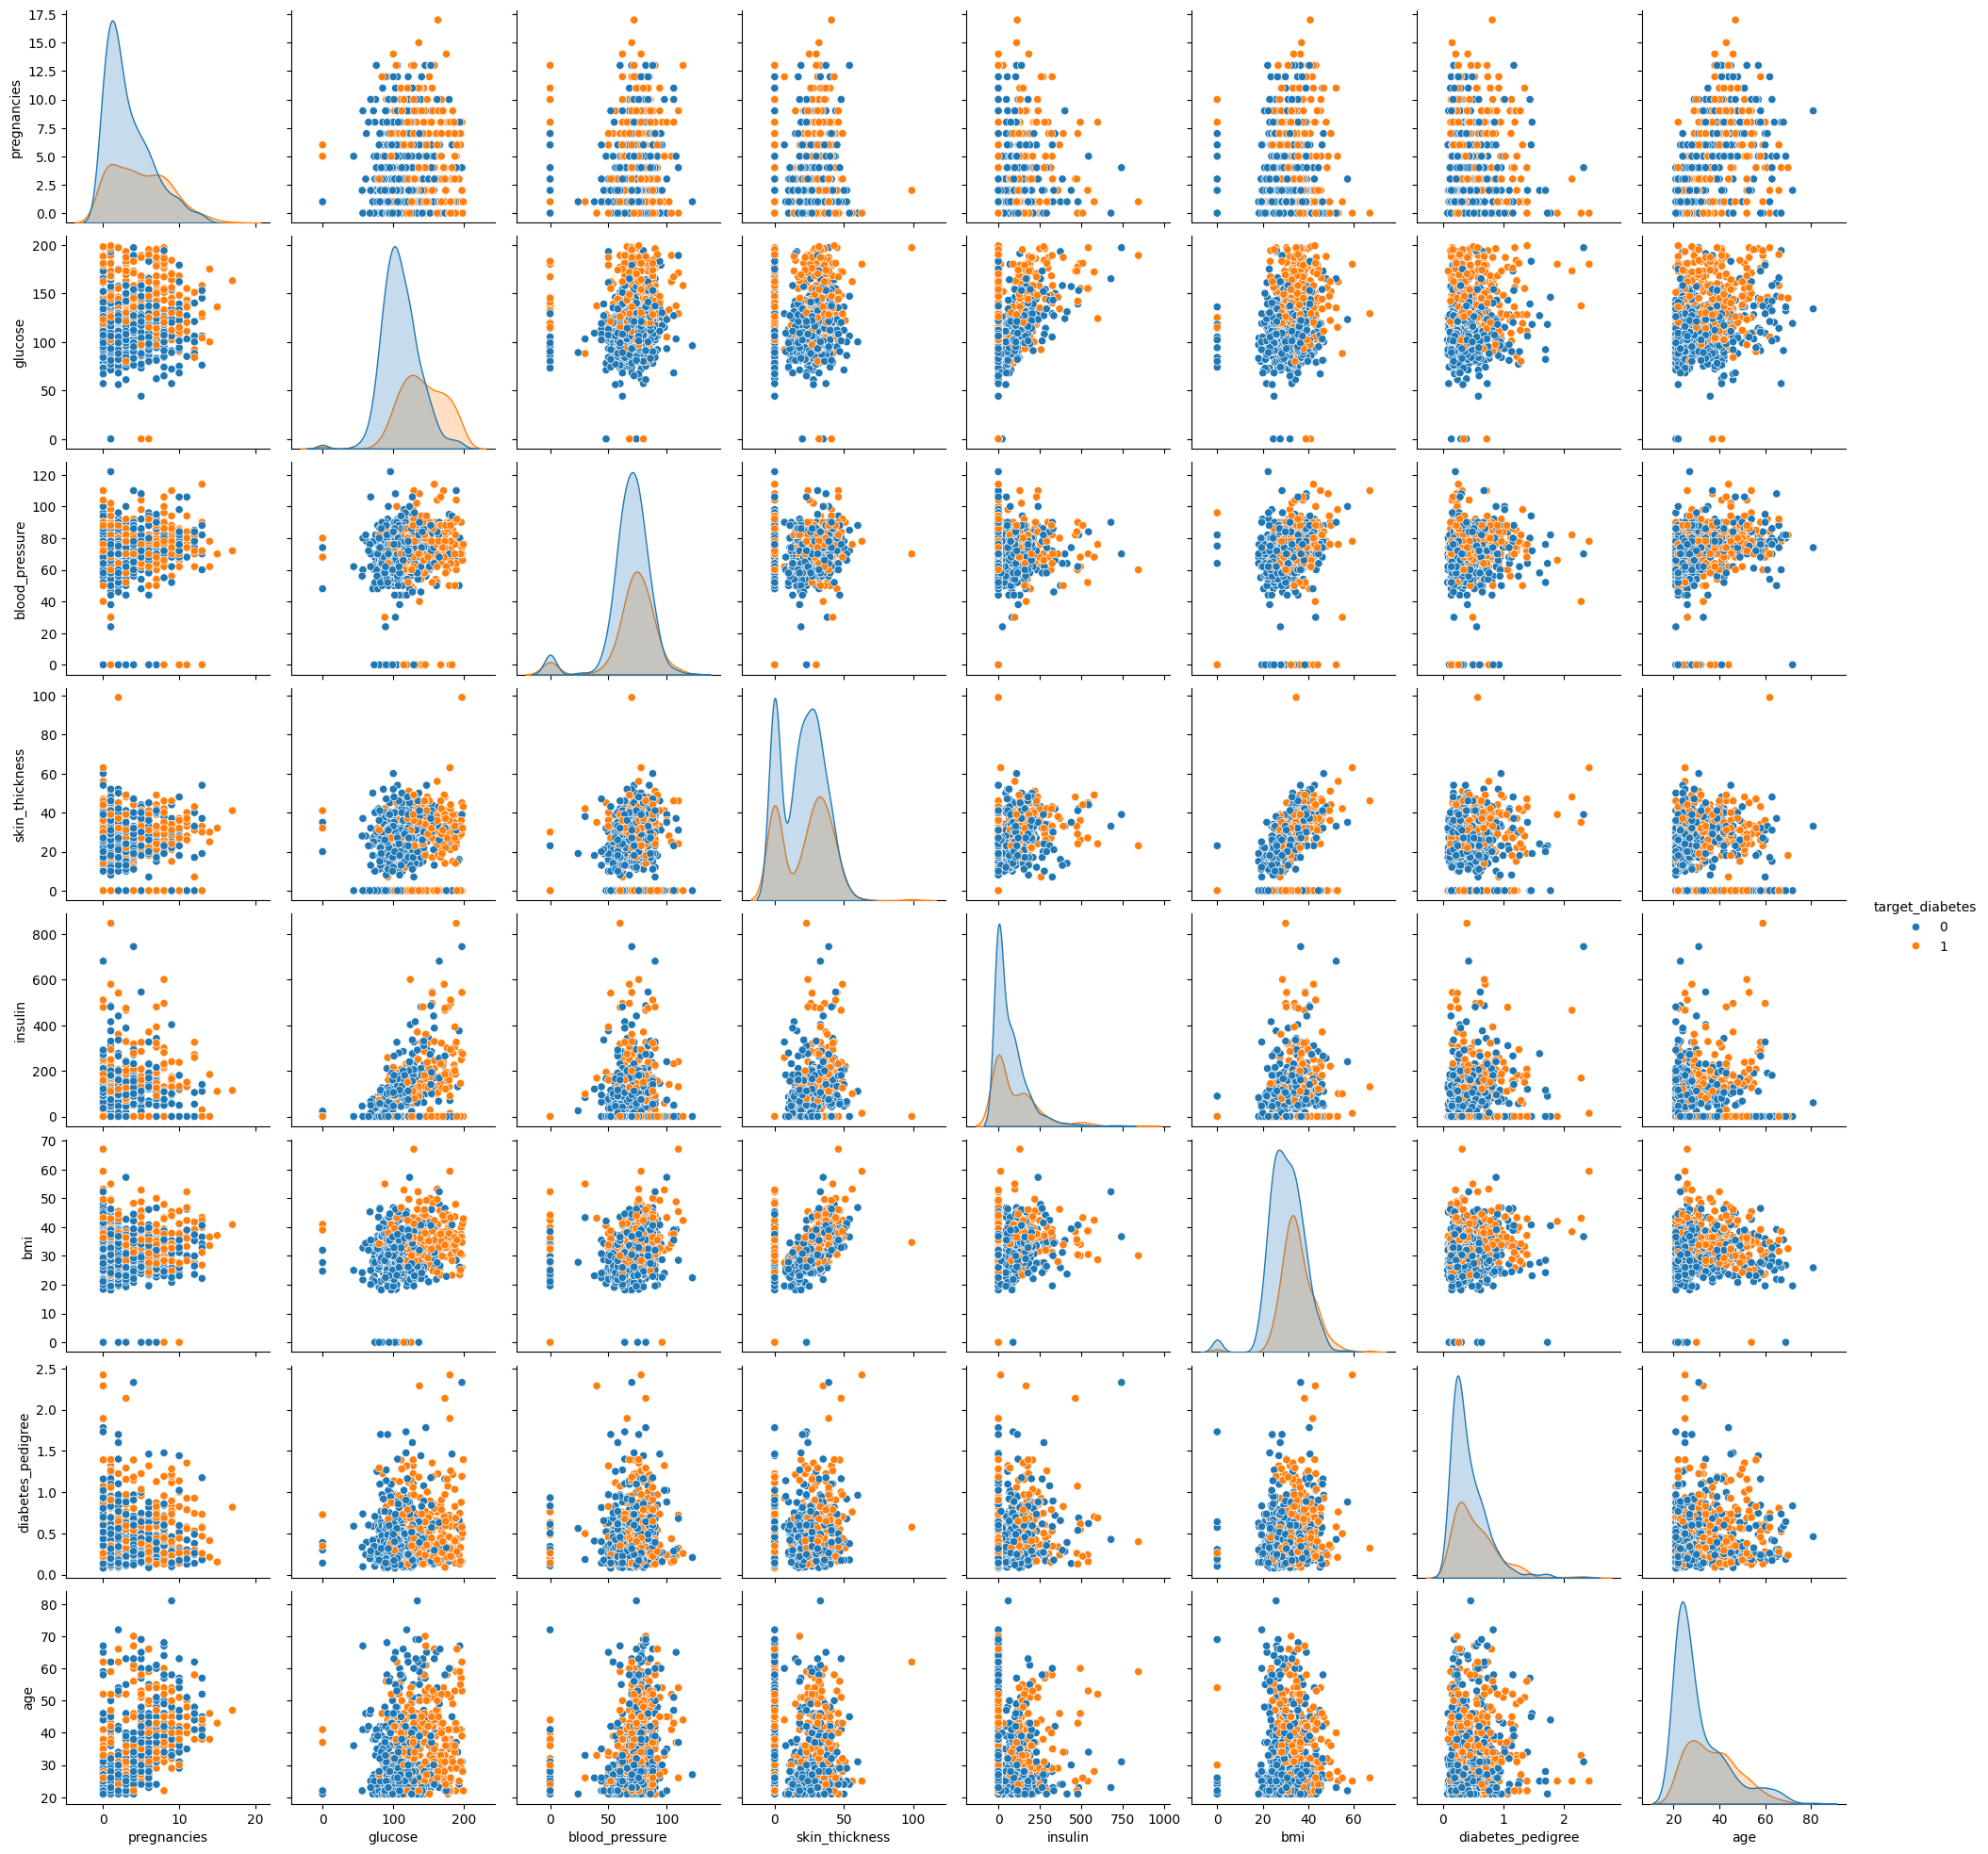

In [21]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values='?')

url_diabetes = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names_diabetes = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'target_diabetes']
data_diabetes = pd.read_csv(url_diabetes, names=column_names_diabetes)

# Display basic information about the dataset
print(data.info())
print(data_diabetes.info())

# Visualize the distribution of target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

sns.countplot(x='target_diabetes', data=data_diabetes)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data_diabetes.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()
sns.pairplot(data_diabetes[['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'target_diabetes']], hue='target_diabetes')
plt.show()


HANDLE MISSING VALUES AND STANDARIZE DATA

In [22]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

X = data_imputed.drop(['target_heart', 'target_diabetes'], axis=1)
y = data_imputed[['target_heart', 'target_diabetes']]

y['target_heart'] = np.where(y['target_heart'] > 0, 1, 0)

<ipython-input-22-fd5bcbb5ff07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['target_heart'] = np.where(y['target_heart'] > 0, 1, 0)


TRAIN TEST AND DATA SCALING

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

BUILD AND TRAIN THE MODEL

In [24]:
rf = RandomForestClassifier(random_state=42)
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

multi_target_rf.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1)

DEFINE THE PREDICTION FUNCTION

In [25]:
def predict_diseases(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal,
                     pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree):
  # Convert inputs to the correct data types
    age = int(age)
    sex = 1 if sex == "Male" else 0
    cp = int(cp)
    trestbps = int(trestbps)
    chol = int(chol)
    fbs = 1 if fbs == "True" else 0
    restecg = int(restecg)
    thalach = int(thalach)
    exang = 1 if exang == "Yes" else 0
    oldpeak = float(oldpeak)
    slope = int(slope)
    ca = int(ca)
    thal = int(thal)
    pregnancies = int(pregnancies)
    glucose = int(glucose)
    blood_pressure = int(blood_pressure)
    skin_thickness = int(skin_thickness)
    insulin = int(insulin)
    bmi = float(bmi)
    diabetes_pedigree = float(diabetes_pedigree)
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal,
                            pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree]])
    prediction = multi_target_rf.predict(input_data)
    probability = multi_target_rf.predict_proba(input_data)
    result = {
        "Heart Disease Prediction": "Heart Disease" if prediction[0, 0] == 1 else "No Heart Disease",
        "Heart Disease Probability": probability[0][0][1],
        "Diabetes Prediction": "Diabetes" if prediction[0, 1] == 1 else "No Diabetes",
        "Diabetes Probability": probability[1][0][1],
    }
    return result


CREATE INTERFACE

In [26]:
import gradio as gr
iface = gr.Interface(
    fn=predict_diseases,
    inputs=[
        gr.Slider(20, 80, value=50, label="Age"),
        gr.Radio(["Male", "Female"], value="Male", label="Sex"),
        gr.Slider(0, 3, value=1, label="CP (Chest Pain Type)"),
        gr.Slider(90, 200, value=130, label="Resting Blood Pressure (trestbps)"),
        gr.Slider(100, 400, value=200, label="Cholesterol (chol)"),
        gr.Radio(["True", "False"], value="False", label="Fasting Blood Sugar > 120 mg/dl (fbs)"),
        gr.Slider(0, 2, value=0, label="Resting ECG (restecg)"),
        gr.Slider(70, 200, value=150, label="Max Heart Rate Achieved (thalach)"),
        gr.Radio(["Yes", "No"], value="No", label="Exercise Induced Angina (exang)"),
        gr.Slider(0.0, 6.0, value=1.0, step=0.1, label="ST Depression Induced by Exercise (oldpeak)"),
        gr.Slider(0, 2, value=1, label="Slope of the Peak Exercise ST Segment (slope)"),
        gr.Slider(0, 3, value=0, label="Number of Major Vessels (ca)"),
        gr.Slider(0, 3, value=2, label="Thalassemia (thal)"),
        gr.Slider(0, 20, value=1, label="Pregnancies"),
        gr.Slider(50, 200, value=120, label="Glucose"),
        gr.Slider(40, 120, value=70, label="Blood Pressure"),
        gr.Slider(0, 99, value=20, label="Skin Thickness"),
        gr.Slider(0, 846, value=80, label="Insulin"),
        gr.Slider(10.0, 70.0, value=30.0, step=0.1, label="BMI"),
        gr.Slider(0.0, 2.5, value=0.5, step=0.1, label="Diabetes Pedigree Function"),
    ],
    outputs="json",
    title="Heart Disease and Diabetes Prediction",
    description="Predict the likelihood of heart disease and diabetes based on patient data."
)


In [27]:
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e679070bb271704e05.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
